# Order of Australia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [232]:
australia=pd.read_csv("data/order-of-australia.csv")

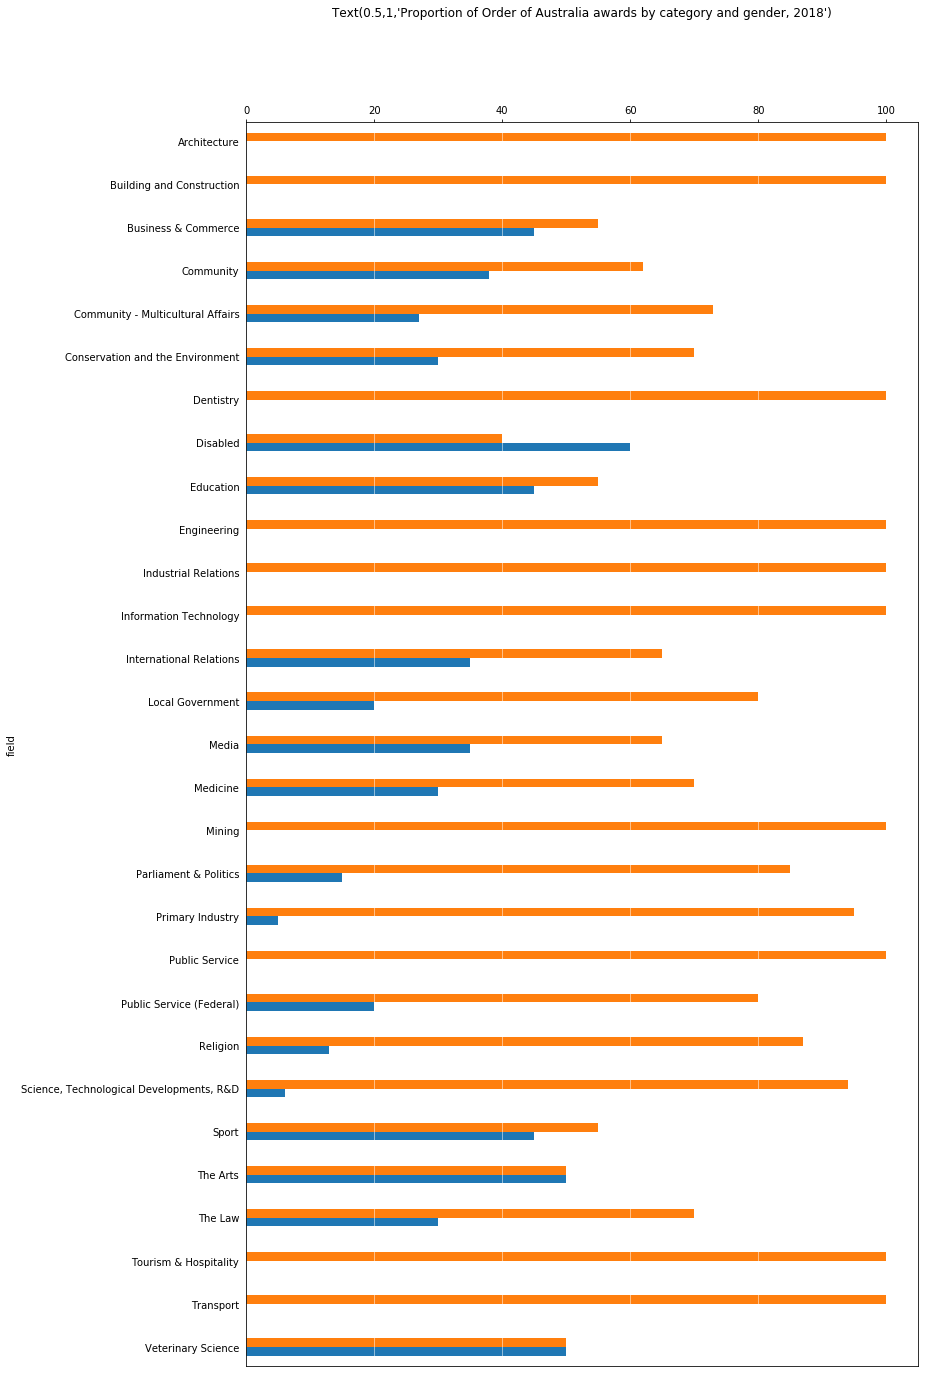

In [429]:
# Convert and add column
australia["percent_male"] = australia["percent_male"].astype(int)
australia["percent_female"] = 100 - australia["percent_male"]
australia["percent_female"] = australia["percent_female"].astype(int)
# Graph
ax = australia.iloc[::-1].plot(x="field", y=["percent_female", "percent_male"], kind='barh', figsize=(13,19), width=0.4, legend=False)
ax.xaxis.set_ticks_position('top')
# Strip ticks
plt.tick_params(axis='y', which='both',left='off', right='off')
# Set title
figure_title = ax.set_title("Proportion of Order of Australia awards by category and gender, 2018")
plt.title(figure_title, y=1.08)
# Set the grid
ax.grid(axis='x', which='major', linestyle='-', linewidth='0.5', color='white')
# Save
plt.tight_layout()
plt.savefig("Gender_guardian.pdf", transparent=True)

# Oxfam

In [233]:
oxfam = pd.read_csv("data/oxfam.csv")

In [428]:
# Convert
oxfam["dist_from_avg_rank"] = oxfam["dist_from_avg_rank"].astype(int)
oxfam["rank"] = oxfam["rank"].astype(str)
oxfam["metric"] = oxfam["metric"].astype(str)

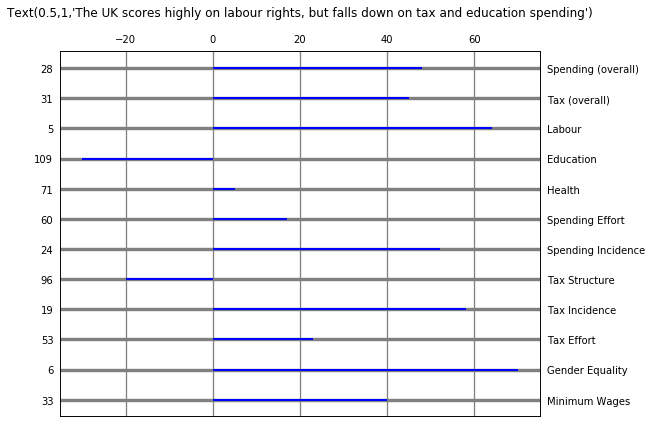

In [427]:
# Plot
fig, ax = plt.subplots(figsize=(9,6))
ax.hlines(xmin=0, xmax=oxfam["dist_from_avg_rank"], y=oxfam.iloc[::-1].index, color="blue", linewidth=2 )
ax.xaxis.set_ticks_position('top')
# Set the grid
ax.grid(axis='x', which='major', linestyle='-', linewidth='1.3', color='grey')
ax.grid(axis='y', which='major', linestyle='-', linewidth='3.4', color='grey')
# Set title
figure_title = ax.set_title("The UK scores highly on labour rights, but falls down on tax and education spending")
plt.title(figure_title, y=1.08)
# Rename ticks because twiny was unordering everything
ax.set_yticks([0,1,2,3,4,5,6,7,8,9,10,11])
oxfam['tick_label_left'] = oxfam["rank"]
oxfam['tick_label_right'] = oxfam["metric"]
ax.set_yticklabels(oxfam['tick_label_left'].iloc[::-1])
# Duplicate the graph, giving it the same x axis
alt = ax.twinx()
# Set the new graph to have its tick marks in the same position
alt.set_yticks(ax.yaxis.get_ticklocs()) 
alt.set_ylim(ax.get_ylim())
# Set the labels for the tick marks to be the same, too
alt.set_yticklabels(oxfam['tick_label_right'].iloc[::-1])
# Strip ticks
ax.tick_params(axis='y', which='both', left='off', right='off')
ax.tick_params(axis='x', which='both',top='off', bottom='off')
alt.tick_params(axis='y', which='both', left='off', right='off')
# Save
plt.tight_layout()
plt.savefig("uk_spendings.pdf", transparent=True)

# Commute

In [430]:
commute = pd.read_csv("data/commute.csv")
# Convert
commute["distance"]=commute["distance"].astype(int)
commute["pct_wages"] = commute["pct_wages"].astype(float)

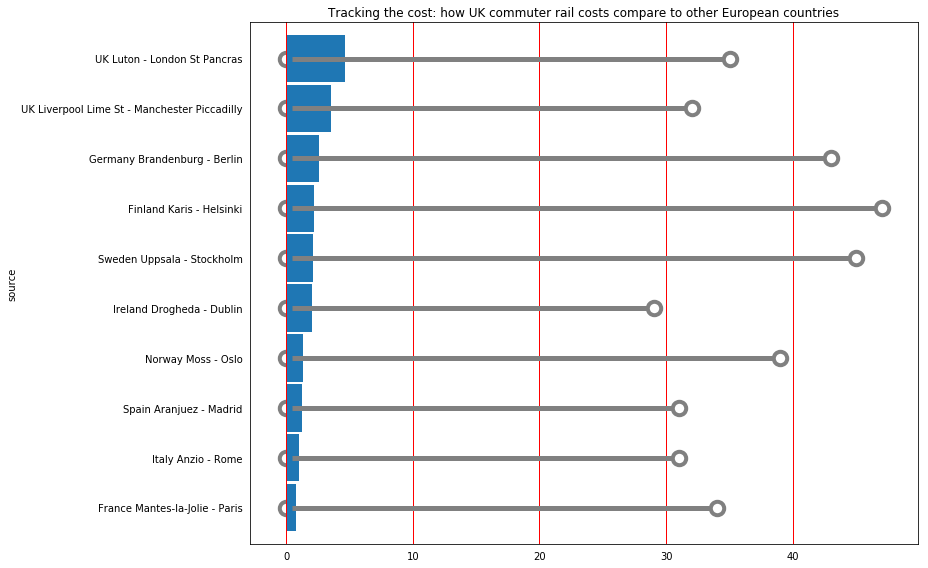

In [431]:
# Adding col dividing all pct_wages by 3 so it makes it nicer in Illustrator
commute["pct_div_3"] = commute['pct_wages']/3
# Plot lines and bars and dots - 0.5 on lines is to make it easier in Illustrator
fig, ax = plt.subplots(figsize=(13,8))
ax.hlines(xmin=0.5, xmax=commute["distance"]-0.5, y=commute["source"].iloc[::-1].index, color="grey", linewidth=5 )
ax.scatter(x=[0]*10, y=commute.iloc[::-1].index, edgecolor="grey", color="white", s=180, linewidth='4')
ax.scatter(x=commute["distance"], y=commute.iloc[::-1].index, edgecolor="grey", color="white", s=180, linewidth='4')
commute.iloc[::-1].plot(x="source", y=("pct_div_3"), kind='barh', ax=ax, width=0.95, legend=False)
commute['tick_label'] = commute["country"] + " " + commute["source"].astype(str)+" " + "-"+ " "+ commute['destination']
ax.set_yticklabels(commute['tick_label'].iloc[::-1])
# Set grid 
ax.grid(axis='x', which='major', linestyle='-', linewidth=1, color='red')
# Set title
ax.set_title("Tracking the cost: how UK commuter rail costs compare to other European countries")
# Strip ticks
plt.tick_params(axis='y', which='both',left='off', right='off')
plt.tick_params(axis='x', which='both',top='off', bottom='off')
# Save
plt.tight_layout()
plt.savefig("commute.pdf", transparent=True)